# Лабораторная работа № 5


/tmp/ipykernel_2668/1302815450.py:4: DeprecationWarning: scipy.misc.face has been deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. Dataset methods have moved into the scipy.datasets module. Use scipy.datasets.face instead.
  face = misc.face(gray=True)


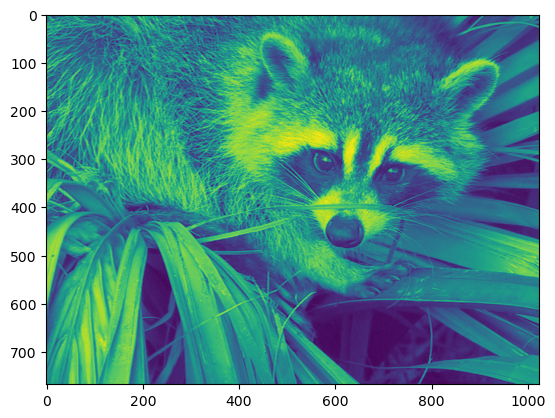

In [2]:
from scipy import misc
import matplotlib.pyplot as plt

face = misc.face(gray=True)

plt.imshow(face)


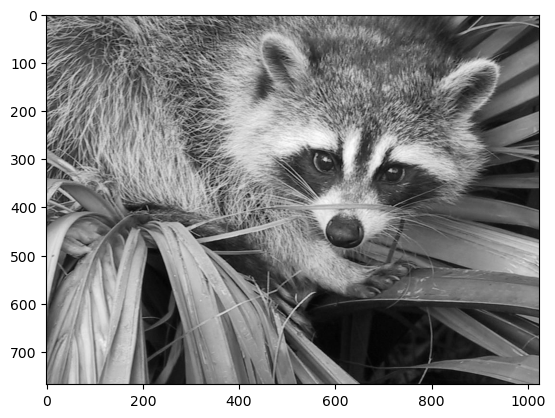

In [3]:
plt.imshow(face, cmap=plt.get_cmap('gray'))

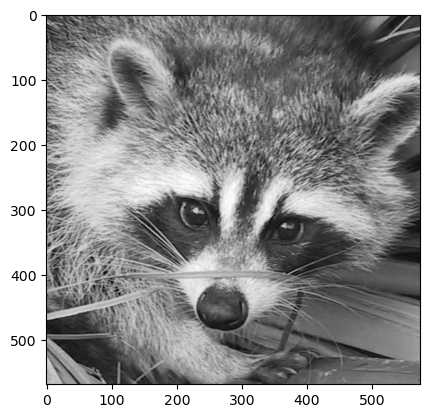

In [4]:
crop_face = face[0:-200, 350:-100]

plt.imshow(crop_face, cmap=plt.get_cmap('gray'))

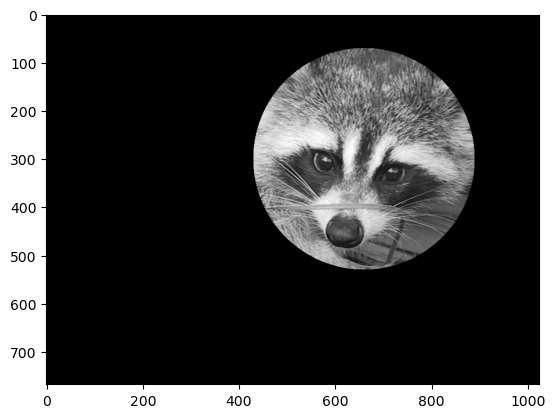

In [5]:
import numpy as np

sy, sx = face.shape
y, x  = np.ogrid[0:sy, 0:sx]

centerx, centery = (660, 300)
mask = ((y - centery)**2 + (x - centerx)**2) > 230**2

face[mask] = 0
plt.imshow(face, cmap='gray')

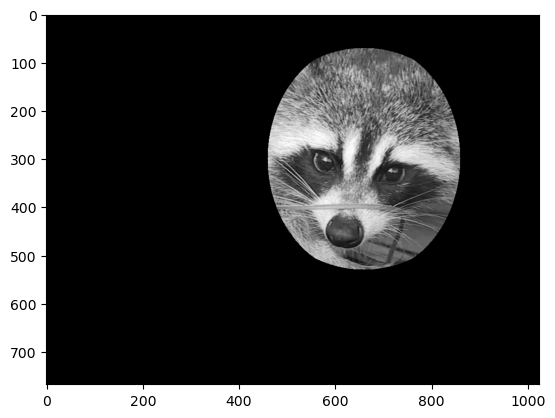

In [6]:
import numpy as np

sy, sx = face.shape
y, x  = np.ogrid[0:sy, 0:sx]

centerx, centery = (660, 300)
mask = (((y - centery)**2)/57600 + ((x - centerx)**2)/40000) > 1

face[mask] = 0
plt.imshow(face, cmap='gray')

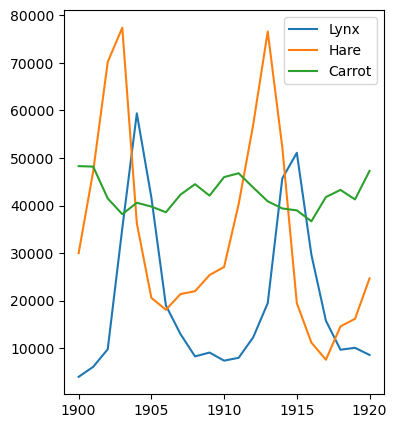

In [7]:
data = np.loadtxt('https://scipy-lectures.org/_downloads/populations.txt')

years, hares, lynx, carrot = data.T
populations = data[:,1:]

years = years.astype(int)

plt.axes([0.2, 0.1, 0.5, 0.8])

plt.plot(years, lynx, years, hares, years, carrot)

plt.legend(('Lynx', 'Hare', 'Carrot'), loc='upper right')

plt.show()


mean
Lynxes: 20166.666666666668
Hares: 34080.95238095238
Carrot: 42400.0 

std
Lynxes: 16254.591536908763
Hares: 20897.906458089667
Carrot: 3322.5062255844787 

Largest population year
species: Hares, Lynxes, Carrot
max years:  [1903 1904 1900] 

Largest population per year
{1900: 'Carrots', 1901: 'Carrots', 1902: 'Hares', 1903: 'Hares', 1904: 'Lynxes', 1905: 'Lynxes', 1906: 'Carrots', 1907: 'Carrots', 1908: 'Carrots', 1909: 'Carrots', 1910: 'Carrots', 1911: 'Carrots', 1912: 'Hares', 1913: 'Hares', 1914: 'Hares', 1915: 'Lynxes', 1916: 'Carrots', 1917: 'Carrots', 1918: 'Carrots', 1919: 'Carrots', 1920: 'Carrots'} 

Is any population greater than 50000 in this year
{1900: False, 1901: False, 1902: True, 1903: True, 1904: True, 1905: False, 1906: False, 1907: False, 1908: False, 1909: False, 1910: False, 1911: False, 1912: True, 1913: True, 1914: True, 1915: True, 1916: False, 1917: False, 1918: False, 1919: False, 1920: False} 

Top 2 years
Hares top 2: [1917 1916]
Lynxes top 2: [1900 19

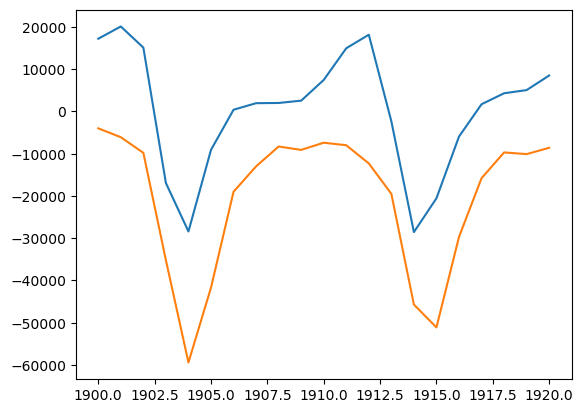

In [62]:
# 1 (mean & std)
print('mean')
print('Lynxes:', (lynx.mean()))
print('Hares:', (hares.mean()))
print('Carrot:', (carrot.mean()), '\n')

print('std')
print('Lynxes:', (lynx.std()))
print('Hares:', (hares.std()))
print('Carrot:', (carrot.std()), '\n')

# 2 largest population year

print('Largest population year')
max_species = np.argmax(populations, axis=0)
print ('species: Hares, Lynxes, Carrot')
print("max years: ", years[max_species], '\n')

# 3 Which kind have largest population per year (argsort and np.array(['H', 'L', 'C']))

max_species = np.argmax(populations, axis=-1)
kinds = np.array(['Hares', 'Lynxes', 'Carrots'])

print('Largest population per year')
print(dict(zip(years,kinds[max_species])), '\n')

# 4 years where any population > 50000 (np.any)
print('Is any population greater than 50000 in this year')
res_exp = np.any(populations, axis=-1, where=(populations > 50000))
print(dict(zip(years,res_exp)), '\n')

# 5 Top 2 years for each kind, when its populaton was lowest. (np.argsort)
print('Top 2 years')
indices = np.argsort(np.transpose(populations), axis=-1)[:,:2]
max_1, max_2, max_3 = indices[0], indices[1], indices[2]
print('Hares top 2:', years[max_1])
print('Lynxes top 2:', years[max_2])
print('Carrot top 2:', years[max_3], '\n')

# 6 Compare hare's population changes and lynx's population (np.gradient, np.corrcoef)

haregrade = np.gradient(hares, 1.0)
print("difference between hares and lynxes: ", np.corrcoef(haregrade, lynx)[0,1])

plt.plot(years, haregrade, years, -lynx)
plt.show()



In [1]:
# 3 Mandelbrot set 

N_max = 50
some_threshold = 50

c = x + 1j*y

z = 0
for j in range(N_max):
    z = z**2 + c
    

NameError: name 'x' is not defined

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import newaxis


/tmp/ipykernel_35191/1956155082.py:8: RuntimeWarning: overflow encountered in square
  z = z**2 + c
/tmp/ipykernel_35191/1956155082.py:8: RuntimeWarning: invalid value encountered in square
  z = z**2 + c


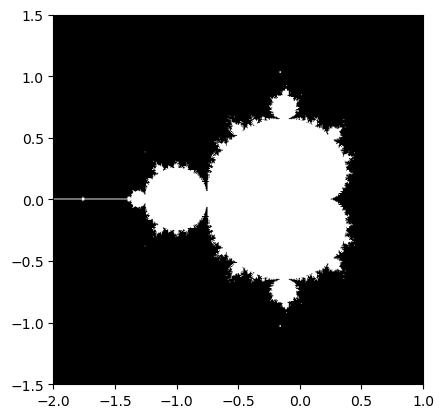

In [3]:
def calculateMandelbrot(N_max, some_treshhold, nx, ny):
    x = np.linspace(-2, 1, nx)
    y = np.linspace(-1.5, 1.5, ny)
    c = x[:,newaxis] + 1j*y[newaxis,:]

    z = c
    for j in range(N_max):
        z = z**2 + c

    mandelbrot_set = (abs(z) < some_threshold)

    return mandelbrot_set

mandelbrot_set = calculateMandelbrot(50, 50., 601, 401)
plt.gray()
plt.imshow(mandelbrot_set.T, extent=[-2, 1, -1.5, 1.5])